In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from emission import *


Bad key text.latex.preview in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default qualit

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
# Neutrino energies [MeV]
E = np.linspace(0, 60, 1000)

In [11]:
#Function for plotting the spectra
def plot_spectrum(E, L = 5e52, stage = 'emission', hierarchy = 'normal',
                 yscale = 'linear', phi = 0, cmap = 'inferno', save = False,
                 save_path = None, figsize = (10,6)):
    fig, ax = plt.subplots(figsize=figsize)
    if stage == 'production':
        plt.plot(E, produced_spectrum(E, 'nu_e', L), color = sns.color_palette(cmap)[2],
                label = r'$\nu_e$', lw = 2)
        plt.plot(E, produced_spectrum(E, 'nubar_e', L), color = sns.color_palette(cmap)[0],
                ls = '--', label = r'$\overline{\nu}_e$', lw = 2)
        plt.plot(E, produced_spectrum(E, 'nu_x', L), color = sns.color_palette(cmap)[4],
                label = r'$\nu_x$', lw = 2)
    elif stage == 'emission':
        plt.plot(E, emitted_spectrum(E, 'nu_e', L, hierarchy, phi = phi), color = sns.color_palette(cmap)[2],
                label = r'$\nu_e$', lw = 2)
        plt.plot(E, emitted_spectrum(E, 'nubar_e', L, hierarchy, phi = phi), color = sns.color_palette(cmap)[0],
                ls = '--', label = r'$\overline{\nu}_e$', lw = 2)
        plt.plot(E, emitted_spectrum(E, 'nu_x', L, hierarchy, phi = phi), color = sns.color_palette(cmap)[4],
                label = r'$\nu_x$', lw = 2)
    elif stage == 'both':
        plt.plot(E, produced_spectrum(E, 'nu_e', L), color = sns.color_palette(cmap)[2],
                label = r'Produced $\nu_e$', lw = 2)
        plt.plot(E, produced_spectrum(E, 'nubar_e', L), color = sns.color_palette(cmap)[0],
                label = r'Produced $\overline{\nu}_e$', lw = 2)
        plt.plot(E, produced_spectrum(E, 'nu_x', L), color = sns.color_palette(cmap)[4],
                label = r'Produced $\nu_x$', lw = 2)
        plt.plot(E, emitted_spectrum(E, 'nu_e', L, hierarchy, phi = phi), color = sns.color_palette(cmap)[2],
                ls = '--', label = r'Emitted $\nu_e$', lw = 2)
        plt.plot(E, emitted_spectrum(E, 'nubar_e', L, hierarchy, phi = phi), color = sns.color_palette(cmap)[0],
                ls = '--', label = r'Emitted $\overline{\nu}_e$', lw = 2)
        plt.plot(E, emitted_spectrum(E, 'nu_x', L, hierarchy, phi = phi), color = sns.color_palette(cmap)[4],
                ls = '--', label = r'Emitted $\nu_x$', lw = 2)
    else:
        raise ValueError('Invalid stage or hierarchy. Please choose between "normal" or\
                        "inverted" for hierarchy and "production" or "emission" for stage. \
                        If you want to plot the spectra in both stages use "both".')
    if stage == 'both':
        plt.legend(title = 'Neutrinos', fontsize = 18, ncol = 2, loc = 'upper right')
    else:
        plt.legend(title = 'Neutrinos', fontsize = 18, ncol = 1, loc = 'upper right')
    plt.title(r'Time-integrated fluxes of CCSN$\nu$ in {} mass hierarchy, 27 $M_\odot$'.format(hierarchy),
            fontsize = 24, pad = 18)
    # plt.title('Espectro de neutrinos produzido na supernova', fontsize = 26, pad = 18)
    # plt.xlabel('Energia do neutrino [MeV]', fontsize = 22)
    plt.xlabel('Neutrino energy [MeV]', fontsize = 20)
    # plt.ylabel('Fluxo integrado', fontsize = 22)
    plt.ylabel('Time-integrated flux', fontsize = 20)
    plt.yscale(yscale)
    plt.xlim(0, 60)
    plt.ylim(0, 2.5e56)
    plt.yticks(fontsize = 16)
    plt.xticks(fontsize = 16)
    ax.yaxis.offsetText.set_fontsize(16)
    lgd = ax.get_legend()
    lgd.get_title().set_fontsize(18)
    fig.patch.set_alpha(1)
    if yscale == 'linear':
        plt.ylim(0)
    plt.tight_layout()
    if save:
        plt.savefig(save_path, dpi = 300, bbox_inches = 'tight')
    plt.show()

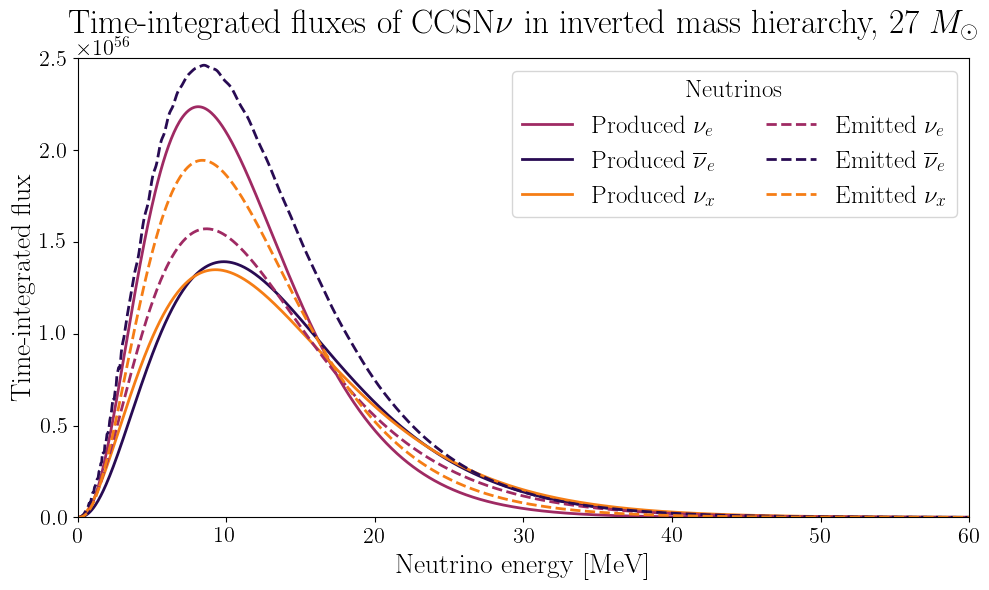

In [14]:
# Calling the function to plot spectra using normal mass hierarchy
# and 1.5e53 ergs of total luminosity
plot_spectrum(E, 5e52, 'both', 'inverted', yscale='linear', phi = np.pi/2, save = False,
             save_path = 'Plots/Emission_and_production_spectra_en.png', figsize = (10,6))

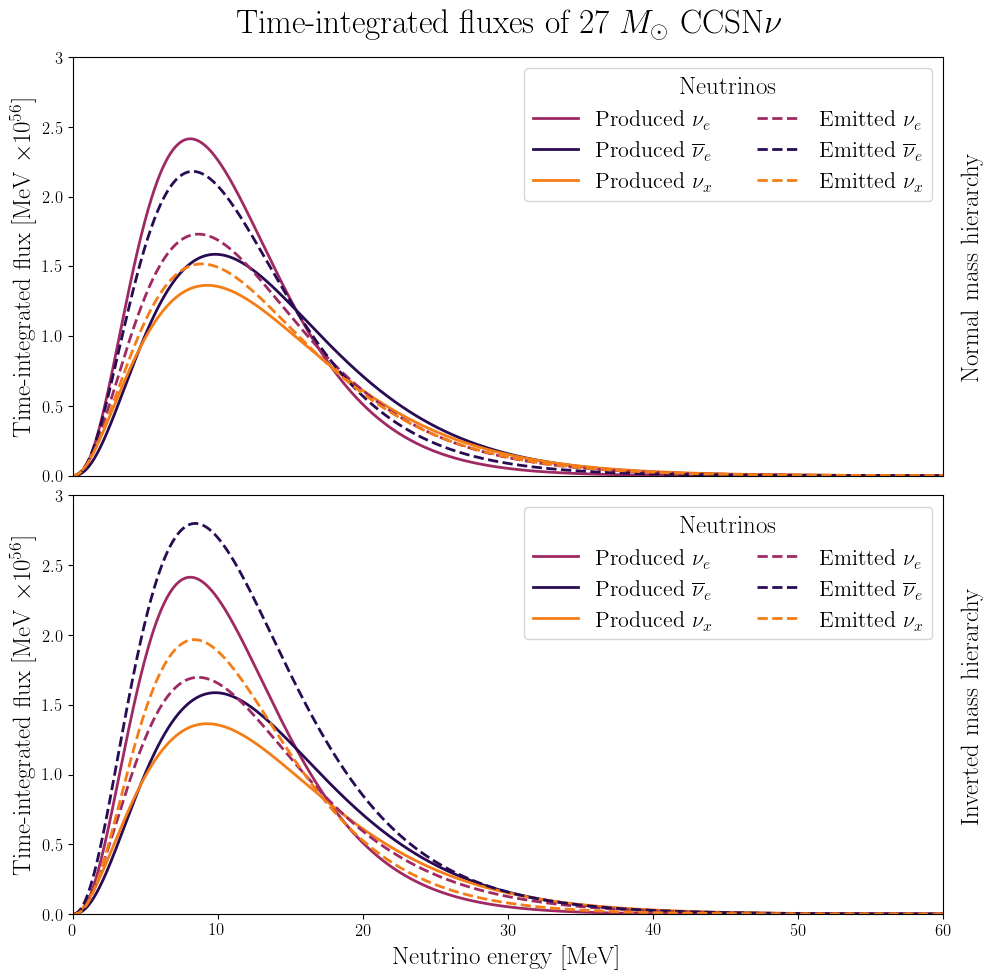

In [61]:
cmap = 'inferno'
phi = 0
fig, ax = plt.subplots(2, 1, figsize=(10,10))
ax[0].plot(E, produced_spectrum(E, 'nu_e', 5.4e52), color = sns.color_palette(cmap)[2],
                label = r'Produced $\nu_e$', lw = 2)
ax[0].plot(E, produced_spectrum(E, 'nubar_e', 5.7e52), color = sns.color_palette(cmap)[0],
        label = r'Produced $\overline{\nu}_e$', lw = 2)
ax[0].plot(E, produced_spectrum(E, 'nu_x', 5.06e52), color = sns.color_palette(cmap)[4],
        label = r'Produced $\nu_x$', lw = 2)
ax[0].plot(E, emitted_spectrum(E, 'nu_e', 5.4e52, 'normal', phi = phi), color = sns.color_palette(cmap)[2],
        ls = '--', label = r'Emitted $\nu_e$', lw = 2)
ax[0].plot(E, emitted_spectrum(E, 'nubar_e', 5.7e52, 'normal', phi = phi), color = sns.color_palette(cmap)[0],
        ls = '--', label = r'Emitted $\overline{\nu}_e$', lw = 2)
ax[0].plot(E, emitted_spectrum(E, 'nu_x', 5.06e52, 'normal', phi = phi), color = sns.color_palette(cmap)[4],
        ls = '--', label = r'Emitted $\nu_x$', lw = 2)
ax[0].legend(title = 'Neutrinos', fontsize = 16, ncol = 2, loc = 'upper right')

ax[0].set_title(r'Time-integrated fluxes of 27 $M_\odot$ CCSN$\nu$',
        fontsize = 24, pad = 18)
ax[0].set_ylabel(r'Time-integrated flux [MeV $\times 10^{56}$]', fontsize = 18)
ax[0].set_xlim(0, 60)
ax[0].set_ylim(0, 3e56)
ax[0].text(62, 1.5e56, 'Normal mass hierarchy', rotation = 90, ha = 'center', va = 'center',
           fontsize = 18)
ax[0].set_yticklabels([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3], fontsize = 12)
ax[0].set_xticks([])
ax[0].yaxis.offsetText.set_fontsize(12)
lgd = ax[0].get_legend()
lgd.get_title().set_fontsize(18)

ax[1].plot(E, produced_spectrum(E, 'nu_e', 5.4e52), color = sns.color_palette(cmap)[2],
                label = r'Produced $\nu_e$', lw = 2)
ax[1].plot(E, produced_spectrum(E, 'nubar_e', 5.7e52), color = sns.color_palette(cmap)[0],
        label = r'Produced $\overline{\nu}_e$', lw = 2)
ax[1].plot(E, produced_spectrum(E, 'nu_x', 5.06e52), color = sns.color_palette(cmap)[4],
        label = r'Produced $\nu_x$', lw = 2)
ax[1].plot(E, emitted_spectrum(E, 'nu_e', 5.4e52, 'inverted', phi = phi), color = sns.color_palette(cmap)[2],
        ls = '--', label = r'Emitted $\nu_e$', lw = 2)
ax[1].plot(E, emitted_spectrum(E, 'nubar_e', 5.7e52, 'inverted', phi = phi), color = sns.color_palette(cmap)[0],
        ls = '--', label = r'Emitted $\overline{\nu}_e$', lw = 2)
ax[1].plot(E, emitted_spectrum(E, 'nu_x', 5.06e52, 'inverted', phi = phi), color = sns.color_palette(cmap)[4],
        ls = '--', label = r'Emitted $\nu_x$', lw = 2)
ax[1].legend(title = 'Neutrinos', fontsize = 16, ncol = 2, loc = 'upper right')
ax[1].set_xlabel('Neutrino energy [MeV]', fontsize = 18)
ax[1].set_ylabel(r'Time-integrated flux [MeV $\times 10^{56}$]', fontsize = 18)
ax[1].set_xlim(0, 60)
ax[1].set_ylim(0, 3e56)
ax[1].text(62, 1.5e56, 'Inverted mass hierarchy', rotation = 90, ha = 'center', va = 'center',
           fontsize = 18)
ax[1].set_yticklabels([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3], fontsize = 12)
ax[1].set_xticklabels([0, 10, 20, 30, 40, 50, 60], fontsize = 12)
# ax[0].set_xticklabels(fontsize = 16)
ax[1].yaxis.offsetText.set_fontsize(12)
lgd = ax[1].get_legend()
lgd.get_title().set_fontsize(18)
pos1 = ax[1].get_position() # get the original position 
pos2 = [pos1.x0, pos1.y0-0.01,  pos1.width, pos1.height] 
ax[1].set_position(pos2) # set a new position

fig.patch.set_alpha(1)
plt.tight_layout()
plt.savefig('Plots/Emission_and_production_spectra_en.png', dpi = 300, bbox_inches = 'tight')
plt.show()

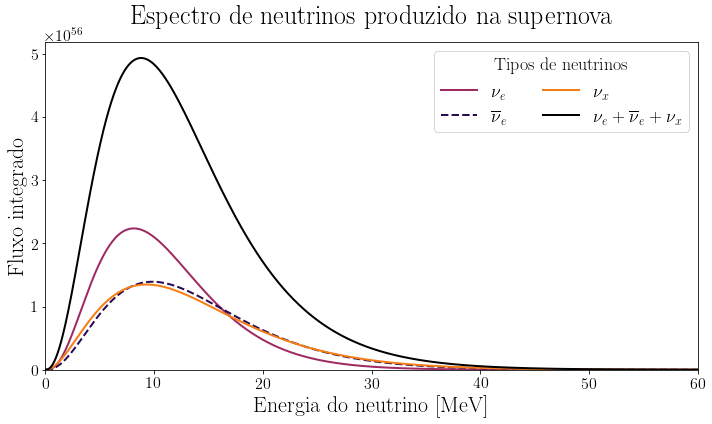

In [47]:
L = 5e52
cmap = 'inferno'
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(E, produced_spectrum(E, 'nu_e', L), color = sns.color_palette(cmap)[2],
        label = r'$\nu_e$', lw = 2)
plt.plot(E, produced_spectrum(E, 'nubar_e', L), color = sns.color_palette(cmap)[0],
        ls = '--', label = r'$\overline{\nu}_e$', lw = 2)
plt.plot(E, produced_spectrum(E, 'nu_x', L), color = sns.color_palette(cmap)[4],
        label = r'$\nu_x$', lw = 2)
plt.plot(E, produced_spectrum(E, 'nu_e', L)+produced_spectrum(E, 'nubar_e', L)+produced_spectrum(E, 'nu_x', L),
         color = 'black', lw = 2, label = r'$\nu_e + \overline{\nu}_e + \nu_x$')

plt.legend(title = 'Tipos de neutrinos', fontsize = 18, ncol = 2, loc = 'upper right')
# plt.title('Time-integrated fluxes of supernova neutrinos in {} mass hierarchy'.format(hierarchy),
#         fontsize = 24, pad = 18)
plt.title('Espectro de neutrinos produzido na supernova', fontsize = 26, pad = 18)
plt.xlabel('Energia do neutrino [MeV]', fontsize = 22)
# plt.xlabel('Neutrino energy [MeV]', fontsize = 20)
plt.ylabel('Fluxo integrado', fontsize = 22)
# plt.ylabel('Time-integrated flux', fontsize = 20)
plt.xlim(0, 60)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
ax.yaxis.offsetText.set_fontsize(16)
lgd = ax.get_legend()
lgd.get_title().set_fontsize(18)
fig.patch.set_alpha(1)
plt.ylim(0)
plt.tight_layout()
plt.savefig('Plots/Production_spectra_total.svg', dpi = 300, bbox_inches = 'tight')
plt.show()